Importing Libraries

In [26]:
import numpy as np
import pandas as pd

Reading Data

In [27]:
data = pd.read_csv('Housing.csv')

In [28]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


See If there are NULL values

In [30]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Skewness :
- Positive skewness (> 0) indicates right-skewed data.
- Negative skewness (< 0) indicates left-skewed data.
- Zero skewness (0) indicates a perfectly symmetrical distribution (no skew).

# Kurstosis :

- Positive kurtosis (> 0) indicates heavy tails and a peaked distribution.
- Negative kurtosis (< 0) indicates light tails and a flat distribution.
- Zero kurtosis (0) indicates a distribution with the same shape as a normal distribution (mesokurtic).

In [32]:
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 1.212239
Kurtosis: 1.960130


Relevant Features are Features which are highly Correlated

<ipython-input-33-d3a86ded380f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_corr = data.corr()


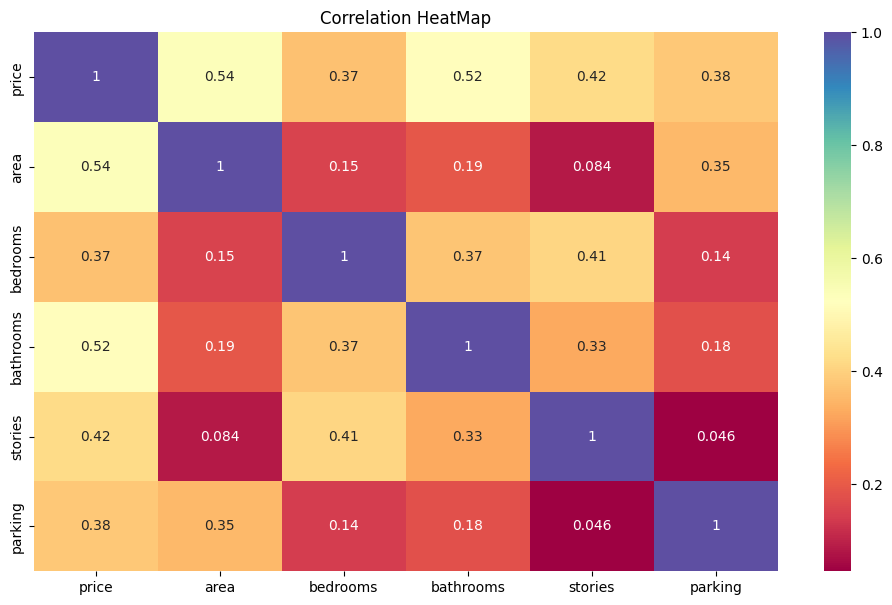

In [33]:
price_corr = data.corr()
plt.figure(figsize= (12,7))
sns.heatmap(price_corr,annot = True,  cmap='Spectral')
plt.title('Correlation HeatMap')
plt.show()

Highest Correlation between area and Price, So we will use them only for the Linear Regression

In [39]:
from sklearn.model_selection import train_test_split
X = data[['area']]
Y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=69)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 1)
(109, 1)
(436,)
(109,)


In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
predictions = lr.predict(X_test)

print("Actual value of the house:- ", y_test[0])
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  13300000
Model Predicted Value:-  5329271.507703371


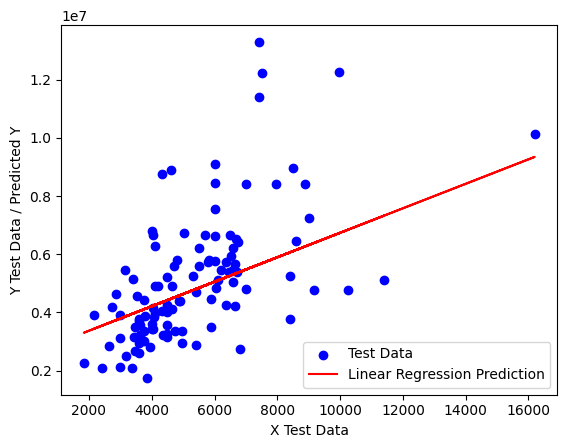

In [45]:
plt.scatter(X_test, y_test, label='Test Data', color='blue')
plt.plot(X_test, predictions, label='Linear Regression Prediction', color='red')

# Add labels and a legend
plt.xlabel('X Test Data')
plt.ylabel('Y Test Data / Predicted Y')
plt.legend()

# Show the plot
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(rmse)

# The error is very large

1892260.413464096


In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

# And Accuracy is about only 28%

0.28682306710531347